# Telecom Churn Analysis & Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
from warnings import filterwarnings 
filterwarnings('ignore')

In [3]:
df=pd.read_csv('C:/Users/Rutuja/Downloads/Customer Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Replacing blanks with 0 as tenure is 0 and no charge is recorded and changed data type to float

In [5]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df.duplicated().sum()

0

In [10]:
df["customerID"].duplicated().sum()

0

Convert 0 and 1 values of senior citizens to yes/no for better understanding

In [11]:
def conv(value):
    if value==1:
        return 'Yes'
    else:
        return 'No'
    
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [12]:
replace_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in replace_cols:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})


In [13]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [14]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Text(0.5, 1.0, 'Count of customers by churn')

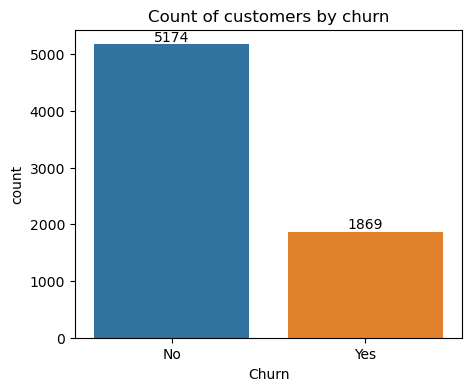

In [15]:
#count of churn
plt.figure(figsize=(5,4))
ax=sns.countplot(x='Churn',data=df)
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title('Count of customers by churn')

Text(0.5, 1.0, 'Percentage of churned customer')

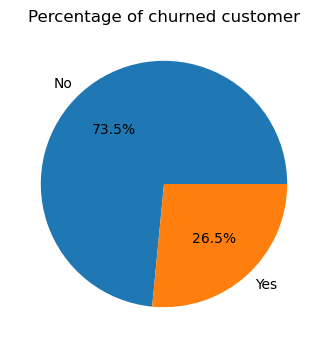

In [16]:
#Churn percentage
plt.figure(figsize=(4,4))
per=df.groupby(by="Churn").agg({'Churn':'count'})
plt.pie(x=per['Churn'],labels=per.index,autopct="%1.1f%%")
plt.title("Percentage of churned customer")

 From given pie chart we can comclude that 26.5% of our customers have churned out.
 now explore the reason behind it

Text(0.5, 1.0, 'Count of Churn by gender')

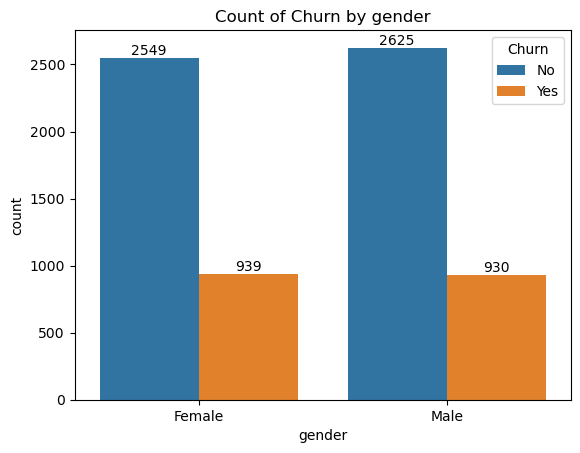

In [17]:
#count of churn gender
ax=sns.countplot(x='gender',data=df,hue='Churn')
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title('Count of Churn by gender')

Text(0.5, 1.0, 'Count of customer by seniorcitizens')

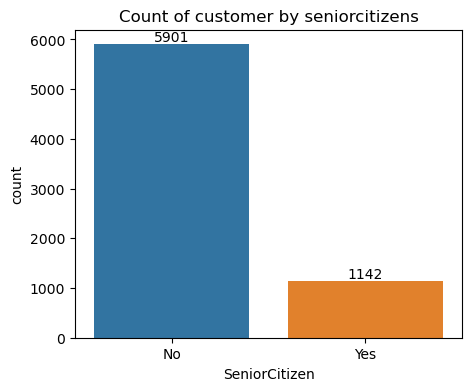

In [18]:
#count of customer by seniorcitizens
plt.figure(figsize=(5,4))
ax=sns.countplot(x='SeniorCitizen',data=df)
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title('Count of customer by seniorcitizens')

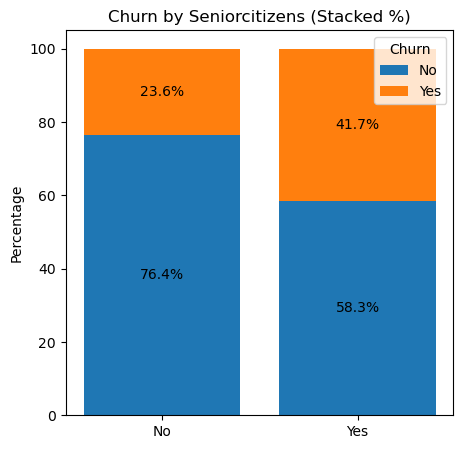

In [19]:
# Churn by seniorcitizens

counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Calculate percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(5, 5))
categories = percentages.index
bars = percentages.columns

bottoms = [0] * len(categories)

for bar in bars:
    values = percentages[bar]
    ax.bar(categories, values, bottom=bottoms, label=bar)
    for i, value in enumerate(values):
        if value > 0: 
            ax.text(i, bottoms[i] + value / 2, f'{value:.1f}%', ha='center',
                    va='center', color='Black', fontsize=10)
    bottoms = [b + v for b, v in zip(bottoms, values)]

# Add labels and title
plt.ylabel('Percentage')
plt.title('Churn by Seniorcitizens (Stacked %)')
plt.legend(title='Churn')
plt.show()

comparative a greater percentage of people in seniorcitizens category have churn

Text(0.5, 1.0, '')

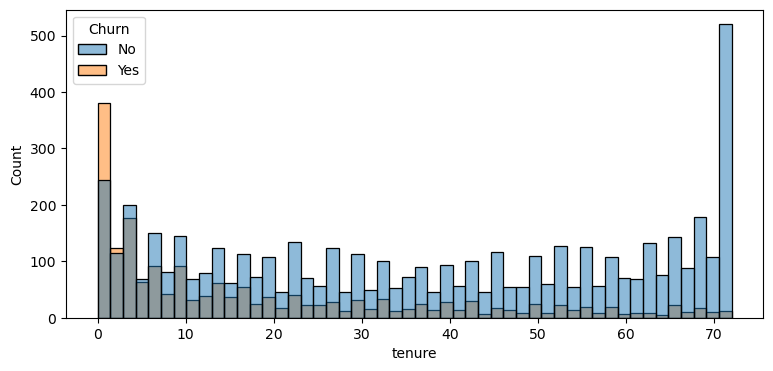

In [20]:
plt.figure(figsize=(9,4))
sns.histplot(data=df,x='tenure',bins=50,hue='Churn')
plt.title('')

People who have used our services for a long time have stayed and 
people who have used our services #1 or 2 months have churned

Text(0.5, 1.0, 'Count of customer by Contract')

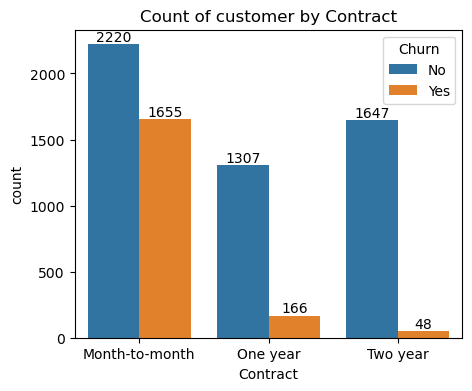

In [21]:
#count of customer by seniorcitizens
plt.figure(figsize=(5,4))
ax=sns.countplot(x='Contract',data=df,hue='Churn')
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title('Count of customer by Contract')

People who have month to month contract are likely to
churned as compared to 1 or 2 years of contract

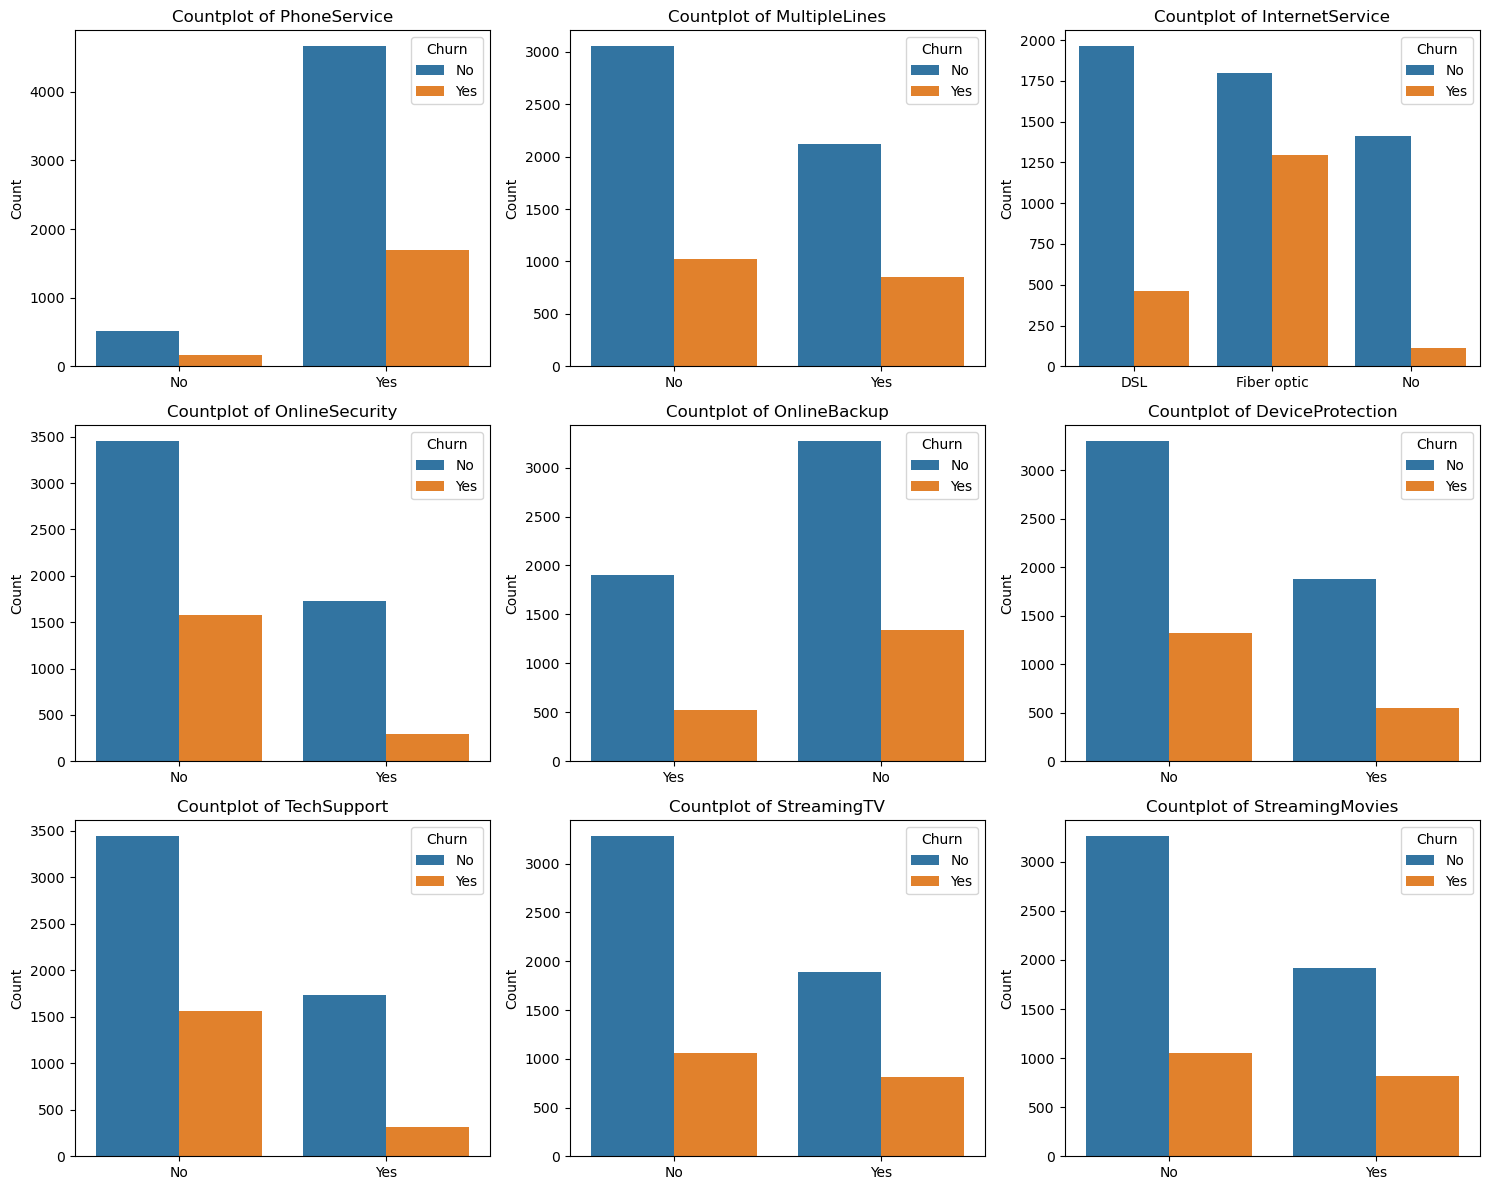

In [22]:
#Subplots of others columns

# Column names to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i],hue=df['Churn'])
    axes[i].set_title(f'Countplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Hide any empty subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The majority of people who do not churn tend to have services like PhoneService,InternetService
and onlineSecurity enabled.For service like onlineBackup , TechSupport and StremmingTv churn rates
are noticeably higher when these services are not used or not unavailable

Text(0.5, 1.0, 'Count of customer by PaymentMethod')

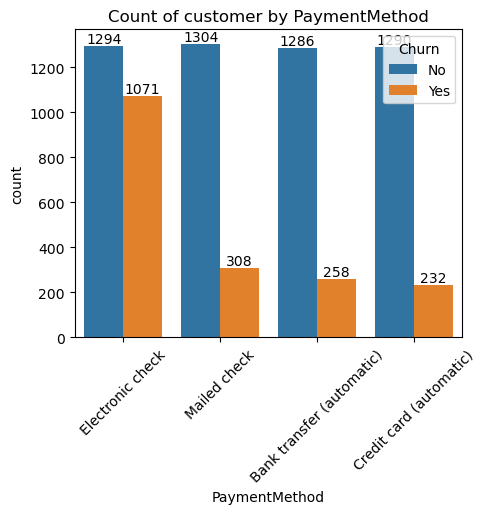

In [23]:
#count of customer by Paymentmethod 
plt.figure(figsize=(5,4))
ax=sns.countplot(x= 'PaymentMethod',data=df,hue='Churn')
plt.xticks(rotation=45)
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title('Count of customer by PaymentMethod')

Customer is likely to churn when he is using electronic check as a payment method

Insights:
1. Customers on month-to-month contracts have a higher churn rate compared to long-term contracts.
2. Higher Monthly Charges correlate with higher churn.
3. Features like Tech Support, Online Security, and Contract Type significantly affect churn.
4. Offering discounts or long-term contract incentives may reduce churn.


# Seperate input and output features

In [24]:
X = df.drop(columns=['Churn'])
y = df['Churn']

# Handling Outliers (IQR Method)

In [25]:
# Select only numerical columns
num_cols = X.select_dtypes(include=np.number).columns

# Apply IQR method to cap outliers
for col in num_cols:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Cap outliers
    X[col] = np.where(X[col] < lower_limit, lower_limit, X[col])
    X[col] = np.where(X[col] > upper_limit, upper_limit, X[col])


In [26]:
X.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


# Separate categorical and continous columns of input features

In [27]:
cat=[]
con=[]
for i in X.columns:
    if X[i].dtypes==object:
        cat.append(i)
    else:
        con.append(i)

In [28]:
print(cat)


['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [29]:
print(con)

['tenure', 'MonthlyCharges', 'TotalCharges']


# Preprocessing

In [30]:
Xcat=X[cat]
Xcon=X[con]

In [31]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [32]:
le=LabelEncoder()

In [33]:
for i in Xcat.columns:
    Xcat[i]=le.fit_transform(Xcat[i])

In [34]:
ss=StandardScaler()

In [35]:
Xcon=pd.DataFrame(ss.fit_transform(Xcon),columns=con)

In [36]:
Xcon

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.992611
1,0.066327,-0.259629,-0.172165
2,-1.236724,-0.362660,-0.958066
3,0.514251,-0.746535,-0.193672
4,-1.236724,0.197365,-0.938874
...,...,...,...
7038,-0.340876,0.665992,-0.127605
7039,1.613701,1.277533,2.242606
7040,-0.870241,-1.168632,-0.852932
7041,-1.155283,0.320338,-0.870513


In [37]:
Xcat

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,5375,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,2
1,3962,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,3
2,2564,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,3
3,5535,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0
4,6511,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,1,1,0,1,0,1,1,1,1,1,1,3
7039,1525,0,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1
7040,3367,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,2
7041,5934,1,1,1,0,1,1,1,0,0,0,0,0,0,0,1,3


In [38]:
X=Xcon.join(Xcat)

In [39]:
X.shape

(7043, 20)

In [40]:
y.shape

(7043,)

In [41]:
X.head(2)

,tenure,MonthlyCharges,TotalCharges,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,-1.277445,-1.160323,-0.992611,5375,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,2
1,0.066327,-0.259629,-0.172165,3962,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,3


# Splitting the data into training and testing

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

In [44]:
print("Training Set:", X_train.shape, y_train.shape)
print("Testing Set:", X_test.shape, y_test.shape)


Training Set: (5634, 20) (5634,)
Testing Set: (1409, 20) (1409,)


# Model selection 

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix ,ConfusionMatrixDisplay

# Logistic Regression

In [60]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [61]:
# Evaluation
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression Results:
Accuracy: 0.7885024840312278
Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.89      0.86      1035
         Yes       0.62      0.51      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



 > **Insight:** Logistic Regression gives a decent accuracy of 
        **78.85%**, performing well for predicting non-churn (`No`) cases. 
        However, it struggles with identifying churned customers (`Yes`)
        — recall is only **51%**, meaning many actual churn cases are missed. 
        A better model or balancing strategy may help improve this.


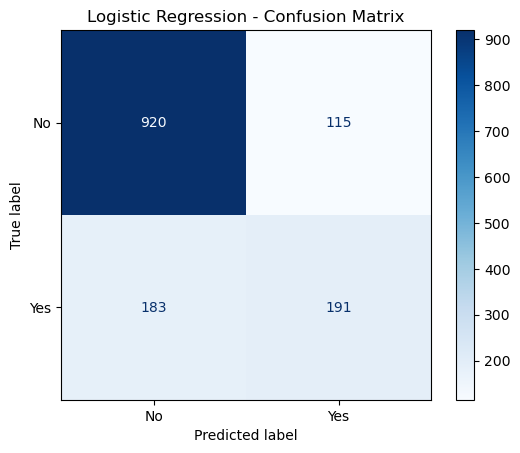

In [62]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test, cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# Random Forest Classifier

In [64]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [65]:
# Evaluation
print("\n Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))



 Random Forest Results:
Accuracy: 0.7856635911994322
Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.89      0.86      1035
         Yes       0.62      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409



> **Insight:** Random Forest achieved an accuracy of **78.56%**, 
    similar to Logistic Regression. It performs well in predicting non-churn 
    cases but still struggles with churn (`Yes`) customers — recall is only **49%**. 
    This suggests the model is biased toward the majority class and may benefit from
    class balancing techniques.


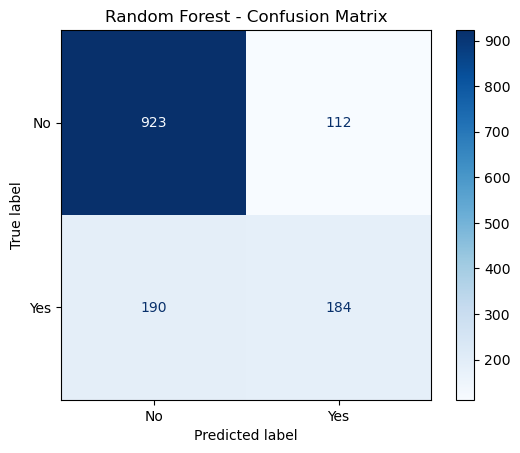

In [67]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.show()

In [68]:
# Feature Importance (Random Forest)

In [69]:
importances = rf_model.feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

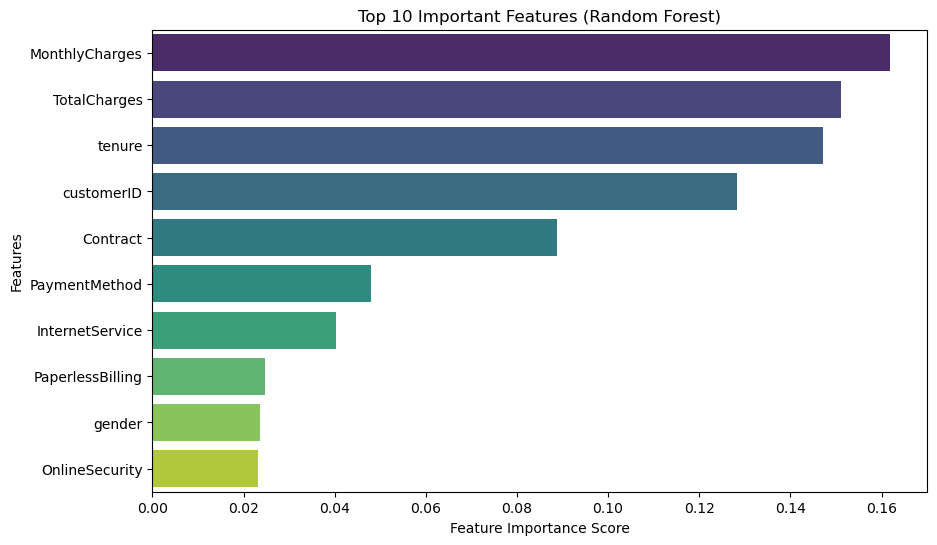

In [70]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp[:10], y=feat_imp[:10].index, palette="viridis")
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

> 💡 **Insight:** The top factors influencing churn prediction are **MonthlyCharges**, 
    **TotalCharges**, and **tenure**, indicating that cost and customer duration play a key role in churn. 
    Features like **Contract type** and **PaymentMethod** also significantly impact churn behavior. 
    These can guide targeted retention strategies.
